# Getting started with IonQ and JSON on Azure Quantum

This notebook shows how to send a basic quantum circuit expressed using the [IonQ JSON spec](https://docs.ionq.com/#tag/quantum_programs) to a Quantinuum target via the Azure Quantum service.

First, install `azure-quantum` and optionally `matplotlib` for plotting:

In [1]:
# To install the Azure Quantum client package, uncomment and run the line below:
#
# !pip install azure-quantum==0.19.2109.165653 --quiet
#
# We also recommend installing matplotlib, if you don't have it installed already:
# !pip install matplotlib --quiet

## Connecting to the Azure Quantum service

To connect to the Azure Quantum service, find the resource ID and location of your Workspace from the Azure portal here: https://portal.azure.com. Navigate to your Azure Quantum workspace and copy the values from the header.

<img src="../azure-quantum-resource-id.png" alt="How to retrieve the resource ID and location from an Azure Quantum workspace">

In [2]:
from azure.quantum import Workspace
from azure.quantum.target import IonQ

# Enter your workspace details here
# Find your resource ID and location via portal.azure.com
workspace = Workspace(
    resource_id="",
    location=""
)

Use `workspace.get_targets` to see what targets are currently available for the Quantinuum provider, including wait times. Running this method will trigger authentication to your Microsoft account, if you're not already logged in.

In [3]:
workspace.get_targets(provider_id="ionq")

[<Target name="ionq.qpu", avg. queue time=54 s, Available>,
 <Target name="ionq.simulator", avg. queue time=0 s, Available>]

In [4]:
# See https://docs.ionq.com/#tag/quantum_programs for JSON format spec
circuit = {
    "qubits": 3,
    "circuit": [
        {
        "gate": "h",
        "target": 0
        },
        {
        "gate": "cnot",
        "control": 0,
        "target": 1
        },
        {
        "gate": "cnot",
        "control": 0,
        "target": 2
        },
    ]
}

### Run on IonQ Simulator

Submit the circuit to the IonQ Simulator target. The following example uses the IonQ simulator, which returns a Job object. For more information, see [Azure Quantum Job](https://review.docs.microsoft.com/azure/quantum/optimization-job-reference).

In [7]:
target = IonQ(workspace=workspace, name="ionq.simulator")
job = target.submit(circuit)

In [8]:
job.id

'628e950a-1d85-11ec-910f-70bc105c1854'

Wait until the job is complete and then fetch the results.

In [9]:
results = job.get_results()
results

....

{'duration': 6075357, 'histogram': {'0': 0.5, '7': 0.5}}

You can then visualize the results using [Matplotlib](https://matplotlib.org/stable/users/installing.html).

Text(0, 0.5, 'Probabilities')

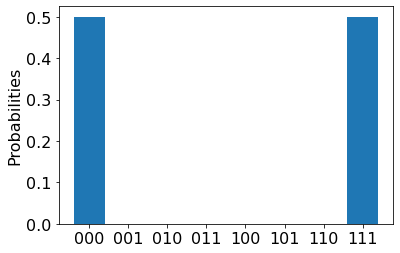

In [10]:
%matplotlib inline
import pylab as pl
pl.rcParams["font.size"] = 16
# The histogram returned by the results can be sparse, so here we add any of the missing bitstring labels.
hist = {format(n, "03b"): 0 for n in range(8)}
hist.update({format(int(k), "03b"): v for k, v in results["histogram"].items()})
pl.bar(hist.keys(), hist.values())
pl.ylabel("Probabilities")

### Run on IonQ QPU

#### Note: The time required to run a circuit on the QPU may vary depending on current queue times.

Submit the circuit to the IonQ QPU target.

In [8]:
qpu_target = IonQ(workspace=workspace, name="ionq.qpu")
qpu_job = qpu_target.submit(circuit)
qpu_job.id

'7a14dd3e-fa72-11eb-83af-00155df1914a'

Wait until the job is complete and then fetch the results.

In [10]:
results = qpu_job.get_results()
results

{'histogram': {'0': 0.59, '2': 0.01, '3': 0.03, '7': 0.37}}

Plot the results.

Text(0, 0.5, 'Probabilities')

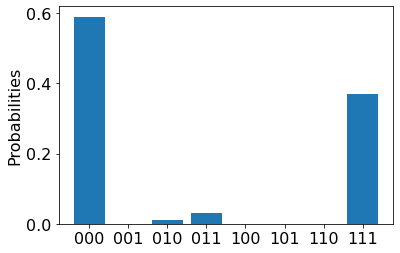

In [11]:
pl.rcParams["font.size"] = 16
hist = {format(n, "03b"): 0 for n in range(8)}
hist.update({format(int(k), "03b"): v for k, v in results["histogram"].items()})
pl.bar(hist.keys(), hist.values())
pl.ylabel("Probabilities")